In [28]:
using MatrixNetworks
using Distributions
using Gadfly
using Clustering
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using SphericalGraphEmbedding
using Random

### LFR benchmark
Loading data and random permute

In [49]:
# Loading data
community0 = readdlm("Data/LFRBenchmarks/LFR3/community.dat");
adj = readdlm("Data/LFRBenchmarks/LFR3/network.dat");

# converting to int array
community_true = community0[:,2];
community_true = convert(Array{Int64},community_true);

N = length(community_true);

# construct adjacency matrix
n_edge2 = size(adj)[1];
A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N)

# largest connected component
A,_ = largest_component(A);
adj = 0; # clear memory

# random (unif) permutation
ind = randperm(N)
A = A[ind,ind];
community_true = community_true[ind];

Embed and cluster

In [50]:
# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-8;

# number of columns of initial guess
r = 40;

# number of centroids thrown in embedding
n_clusters = 10;

# nb of times vector partition is repeated
n_it_vec_part = 10;

# nb updates vec part
n_updates = 100; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, r);

# normalized multual information
nmi = mutualinfo(community_true,community)
println("NMI with ground truth: ", nmi)

# beware run twice to get timings without compilation time

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 90 iterations
  0.698697 seconds (2.51 k allocations: 494.168 MiB, 10.96% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 40
Number of updates: 6
Number of communities: 6
Modularity: 0.5743792176720068
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.45389599306300654, 0.39498567163608256, 0.151113030173698, 5.286062704677228e-6, 4.094647695842249e-9]
 -------------------------------------------- 
  1.016025 seconds (364.49 k allocations: 629.848 MiB, 12.88% gc time)
NMI with ground truth: 0.9988130621301559


Plotting coordinates 1-2

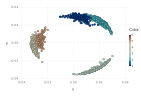

In [51]:
# Plotting 2D-projection
plot(x=x_embed[1,:],y=x_embed[2,:], color = community)
# the colors are the retreived communities

Plotting coordinates 2-3

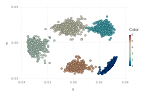

In [52]:
plot(x=x_embed[2,:],y=x_embed[3,:], color = community)

### Power EU graph
Loading data

In [53]:
m = readdlm("Data/PowerEU/ElistPowerEU.txt");
dim = size(m,1);

M_int = zeros(Int64,dim,2);
for i =1:dim
	for j=1:2
		M_int[i,j] = Int64(m[i,j]);
	end
end

N = maximum([maximum(M_int[:,1]),maximum(M_int[:,2])]);

A0 =spzeros(N,N);
A0 = sparse(M_int[:,1],M_int[:,2],vec(ones(Int64,dim,1)),N,N);
A0 = A0+A0';
A,p = largest_component(A0);

A0=0;p=0;m =0;

In [54]:
# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-10;

# number of columns of initial guess
r = 50;

# number of centroids thrown in embedding
n_clusters = 100;

# nb of times vector partition is repeated
n_it_vec_part = 1000;

# nb updates vec part
n_updates = 100; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, r)


# beware run twice to get timings without compilation time

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 235 iterations
  3.599324 seconds (6.99 k allocations: 2.144 GiB, 12.02% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 50
Number of updates: 2
Number of communities: 45
Modularity: 0.9005605318186073
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.5369561985682996, 0.33972581771727, 0.11043812908395359, 0.00748931880384405, 0.0033336633181379445]
 -------------------------------------------- 
 63.230423 seconds (22.26 M allocations: 18.032 GiB, 5.97% gc time)


([0.013090531560131017 0.013015385338238752 … -0.006082942315973038 -0.0051112495125539975; 0.0072947728653982875 0.007905925289709514 … -0.03188441066468308 -0.03212372792305304; … ; 0.004185080137643506 0.02136379754817448 … -0.004797860199322665 -0.006332726882163867; -0.03486998888730057 -0.03284203498584812 … 0.0041698968171894925 0.0070961790412680135], [1, 1, 1, 2, 1, 1, 1, 3, 4, 4  …  38, 41, 38, 38, 38, 38, 38, 38, 38, 38])

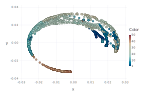

In [55]:
# Plotting 2D-projection
plot(x=x_embed[1,:],y=x_embed[2,:], color = community)
# the colors are the retreived communities

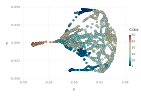

In [56]:
plot(x=x_embed[2,:],y=x_embed[3,:], color = community)